In [2]:
# Histogram of the netapp file sizes
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Spreadsheet contains ls -l in first column
ls = pd.read_excel('netapp_logs.xlsm')

In [62]:
# Make a new df by splitting the fields apart at the blanks and giving them names
fields =ls['ls'].str.split(expand=True)
fields.columns = ['acl', 'ls2', 'owner', 'group', 'fsize', 'month', 'day', 'time', 'fname']

# Split creates strings. Convert the fsize to int
fields.fsize = fields.fsize.astype(int)

# Make a numpy array of fsize
size = np.array(fields.fsize).astype(int)


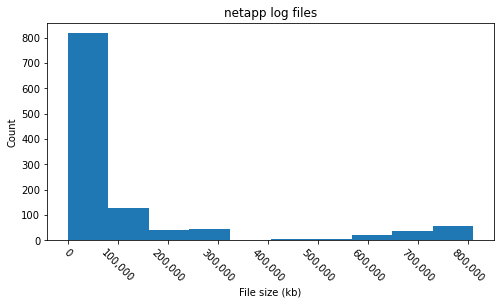

In [67]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(8, 4))

# Plot kB
ax.hist(fields.fsize/1024, bins=10)

# Customize the x axis tick labels becasue they are large
# - Rotate them to save room
# - Format the using an f-string to have commas
ax.tick_params(axis='x', labelrotation=-45 )
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_title(f'netapp log files')
ax.set_xlabel(f'File size (kb)')
ax.set_ylabel(f'Count')

plt.show()
